(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

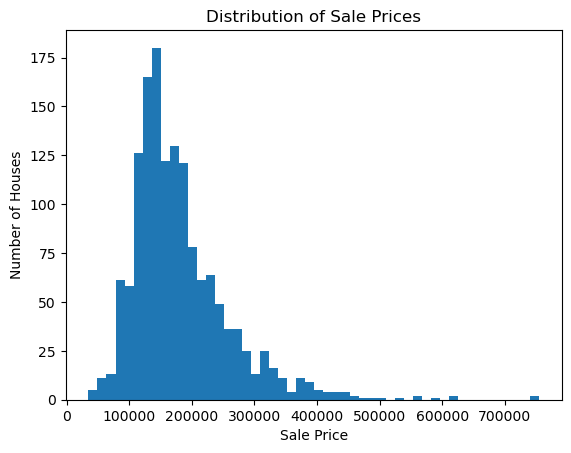

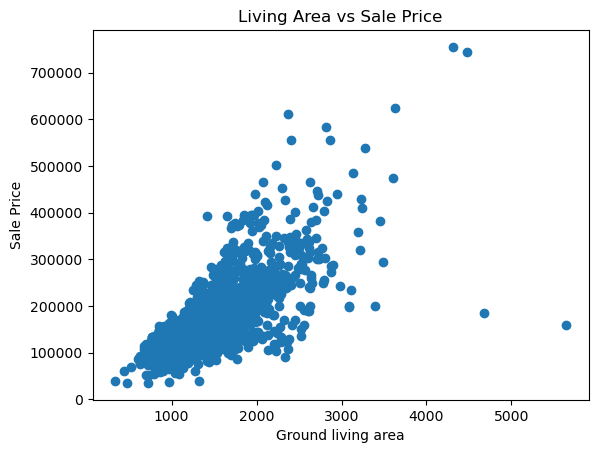

Root Mean Squared Error: 40036.41866406024
R2 Score: 0.7910239048318475


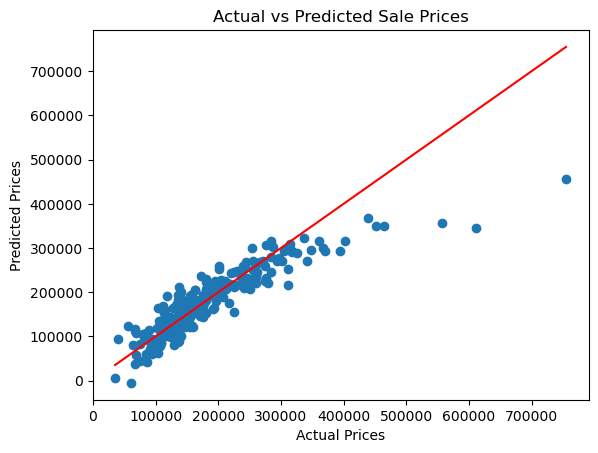

['../models/house_price_model.pkl']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

df = pd.read_csv('../data/train.csv')
print(df.shape)
df.head()
df.info()
df.describe()
plt.hist(df['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Sale Prices')
plt.show()
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Ground living area')
plt.ylabel('Sale Price')
plt.title('Living Area vs Sale Price')
plt.show()
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
X = df[features]
y = df['SalePrice']

# Gérer les valeurs manquantes
X = X.fillna(0)

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()
joblib.dump(model, '../models/house_price_model.pkl')
